In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company Stock and Investment.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
#Converting Month into Datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [5]:
#Checking the datatypes of columns
df.dtypes

Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object

In [6]:
# Creating the first model
df1 = df[['Date','Oil Investments']]

In [7]:
#Checking the top five rows
df1.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [8]:
#Checking the last five rows
df1.tail()

,Date,Oil Investments
1979,2017-09-11,0.005984
1980,2017-10-11,-0.007173
1981,2017-11-13,0.000352
1982,2017-11-14,-0.019376
1983,2017-11-15,-0.007006


In [9]:
#Again checking for datatypes
df1.dtypes

Date               datetime64[ns]
Oil Investments           float64
dtype: object

In [10]:
#Checking for null values
df1.isnull().values.any()

False

In [11]:
#checking the null values in columns
df1.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [12]:
#Making Date as our Index
df1.set_index('Date',inplace=True)
df1.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [13]:
#Checking the null values in columns
df1.isnull().sum()

Oil Investments    0
dtype: int64

In [14]:
#Checking the statistics of the model
df1.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


## Removing Outliers

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.83768566],
       [0.88345251],
       [0.10154433],
       ...,
       [0.02551751],
       [0.61375342],
       [0.21290234]])

In [16]:
threshold=3
print(np.where(z>3))

(array([ 100,  629, 1236, 1423, 1523, 1527, 1539, 1575, 1888], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [17]:
df1_new=df1[(z<3).all(axis=1)]

In [18]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(1984, 1) 		 (1975, 1)


In [19]:
df1 = df1_new
df1.shape

(1975, 1)

In [20]:
## Checking for skewness
df1.skew()

Oil Investments    0.025722
dtype: float64

## Forecasting Using Moving Average

Text(0.5,1,'Stock Investments over Year')

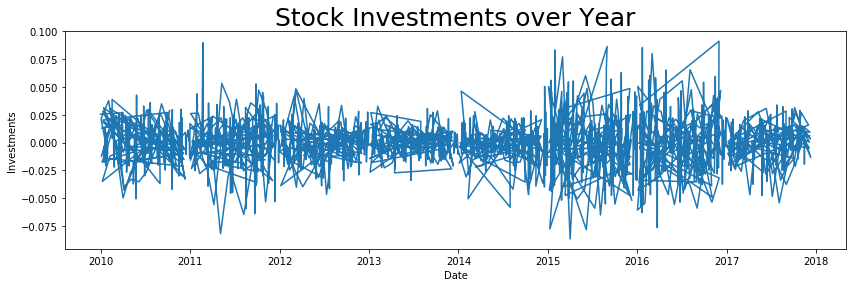

In [21]:
plt.figure(figsize=(14,4))
plt.xlabel('Date')
plt.ylabel('Investments')
plt.plot(df1['Oil Investments'])
plt.title('Stock Investments over Year',fontsize=25)

Observation:
    
    Stock Investments (vertical axis) shows a lot of flucations over the months.

In [22]:
#Forecasting using Moving Average
df1['mavg_12'] = df1['Oil Investments'].rolling(window = 12).mean().shift(1)

In [23]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)
df1[['Oil Investments','mavg_12']][36:55]

,Oil Investments,mavg_12
Date,,
2010-02-24,0.01,0.01
2010-02-25,-0.02,0.01
2010-02-26,0.02,0.01
2010-01-03,-0.01,0.01
2010-02-03,0.01,0.00
2010-03-03,0.02,0.00
2010-04-03,-0.01,0.01
2010-05-03,0.02,0.00
2010-08-03,0.00,0.00


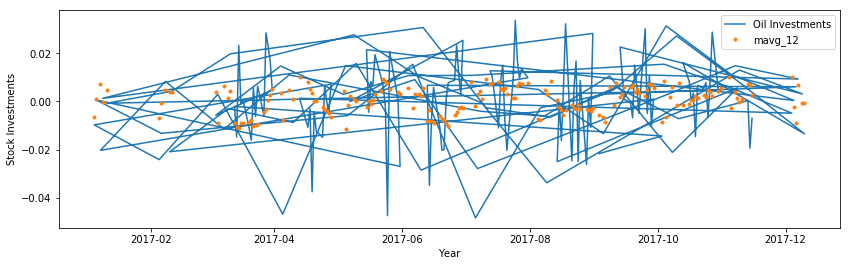

In [24]:
plt.figure(figsize=(14,4))
plt.xlabel('Year')
plt.ylabel('Stock Investments')
plt.plot(df1['Oil Investments'][1800:1980])
plt.plot(df1['mavg_12'][1800:1980], '.')
plt.legend()

Observation:
    
    There is increasing as well as decreasing trend in stock investments over the year

## Claculating Foreasting Accuracy

In [25]:
def get_mape(actual,predicted):
    y_true,y_pred=np.array(actual),np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted) / actual)) * 100, 2)

In [26]:
get_mape(df1['Oil Investments'][30:40].values,
         df1['mavg_12'][30:40].values)

78.33

The MAPE in this case is vary according to our index values.

## Step 2: Visualize the Data

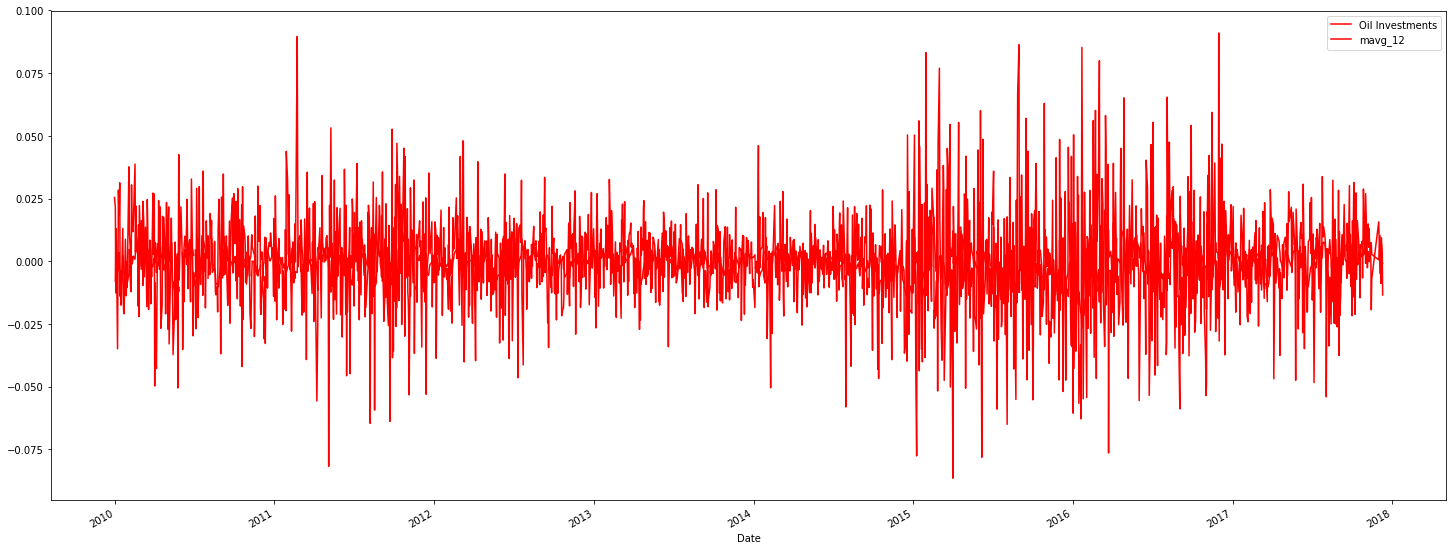

In [27]:
df1.plot(figsize=(25,10),color='r')

### In above plot data looks like seasonal data ,as every year stock Investments goes high and low in the particular year.

### Now we will check if data is stationary or not.

In [28]:
df1.drop(columns=['mavg_12'],axis=1,inplace=True)

In [29]:
df1.head()

,Oil Investments
Date,
2009-12-31,0.03
2010-04-01,0.03
2010-05-01,0.00
2010-06-01,0.02
2010-07-01,-0.01


In [30]:
#Testing for stationary
from statsmodels.tsa.stattools import adfuller

In [31]:
test_result = adfuller(df1['Oil Investments'])

In [32]:
# Just showing the output of test_result
print("The Values given as output by adfuller is : \n 'ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' \n\n", test_result)

The Values given as output by adfuller is : 
 'ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' 

 (-46.29558276634847, 0.0, 0, 1974, {'1%': -3.43366703339965, '5%': -2.8630052761696607, '10%': -2.567550052177805}, -9674.64094494119)


### Most Important value is p-value above

In [33]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(oil_investments):
    result = adfuller(oil_investments)  #same as above variable name changed
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is Stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary")

In [34]:
adfuller_test(df1['Oil Investments'])

ADF Test Statistic : -46.29558276634847
p-value : 0.0
Lags Used : 0
Number of Observations Used : 1974
Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is Stationary


### As p value is less then 0.05 we are going to reject the null hypothesis---Stationary Data.

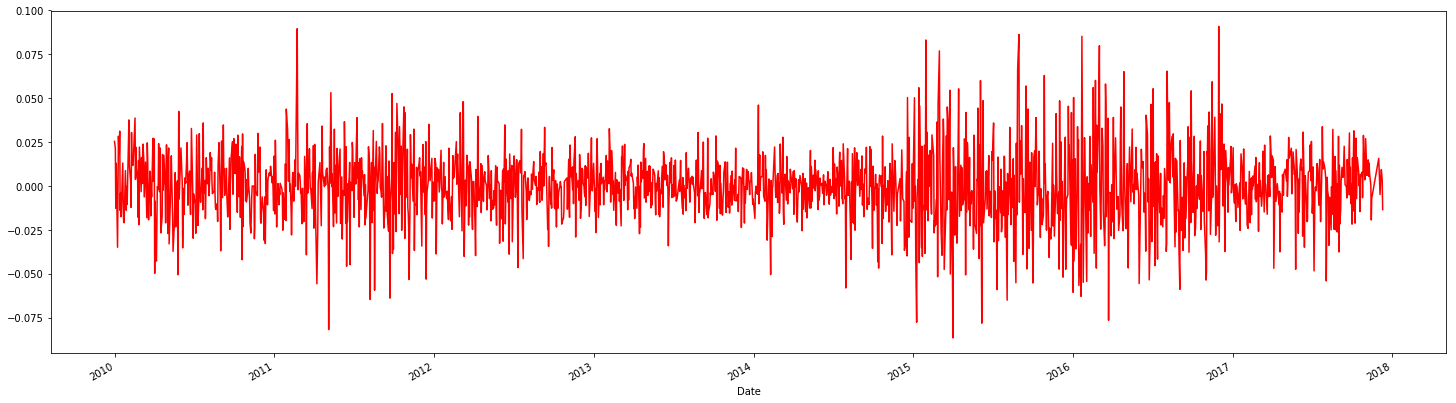

In [35]:
df1['Oil Investments'].plot(figsize=(25,7),color='r')

## Auto Regressive Model

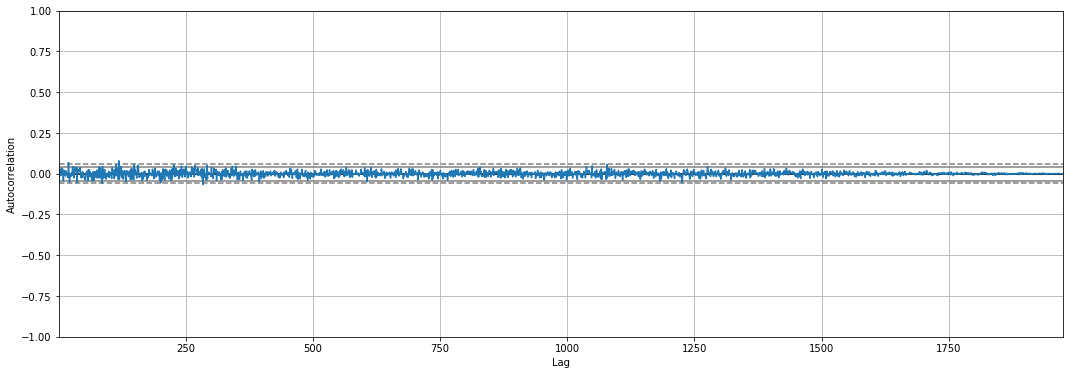

In [36]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(18,6))
autocorrelation_plot(df1['Oil Investments'])
plt.show()

In [37]:
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

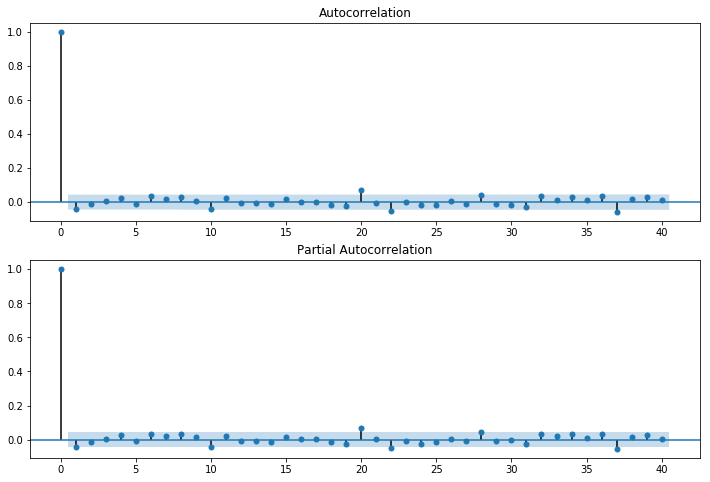

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df1['Oil Investments'], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Oil Investments'], lags = 40, ax = ax2)

In [39]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Oil Investments'],order=(1,1,0))  #This order is p,d,q  where q is 0 or 1.
model_fit = model.fit()

In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3668.303
Method:                       css-mle   S.D. of innovations              0.038
Date:                Fri, 23 Oct 2020   AIC                          -7330.606
Time:                        16:00:41   BIC                          -7313.828
Sample:                             1   HQIC                         -7324.443
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.872e-05      0.001     -0.033      0.974      -0.001       0.001
ar.L1.D.Oil Investments    -0.5130      0.019    -26.631      0.000      -0.551      -0.475
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9492           +0.0000j            1.9492            0.5000
-----------------------------------------------------------------------------
"""

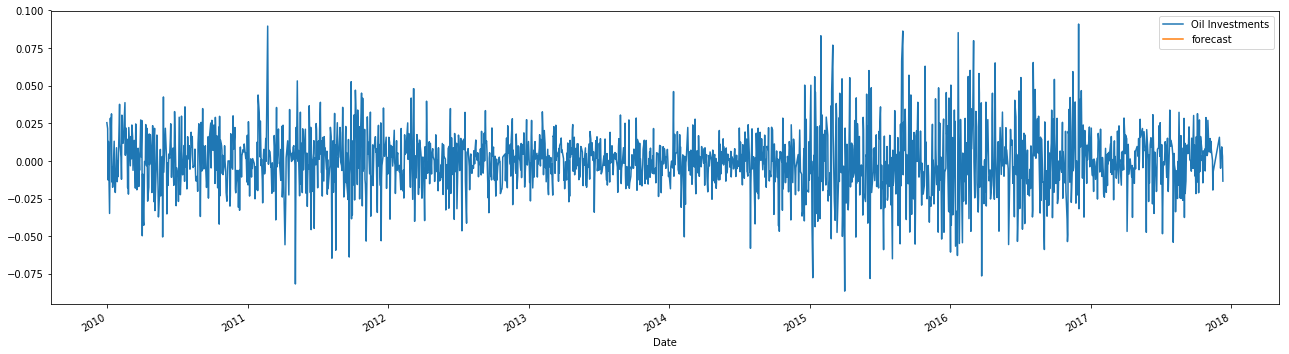

In [42]:
df1['forecast'] = model_fit.predict(start=1234,end=1890,dynamic=True)
df1[['Oil Investments','forecast']].plot(figsize=(22,6))
plt.show()

## Seasonal ARIMA

In [43]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [44]:
model=sm.tsa.statespace.SARIMAX(df1['Oil Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Oil Investments   No. Observations:                 1975
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                4835.116
Date:                            Fri, 23 Oct 2020   AIC                          -9660.232
Time:                                    16:01:21   BIC                          -9632.324
Sample:                                         0   HQIC                         -9649.975
                                           - 1975                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.017     -2.654      0.008      -0.076      -0.011
ma.L1         -0.9970      0.003   -367.116      0.000      -1.002      -0.992
ar.S.L12      -0.0062      0.019     -0.327      0.744      -0.043       0.031
ma.S.L12      -0.9988      0.056    -17.846      0.000      -1.109      -0.889
sigma2         0.0004   2.33e-05     17.530      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               318.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

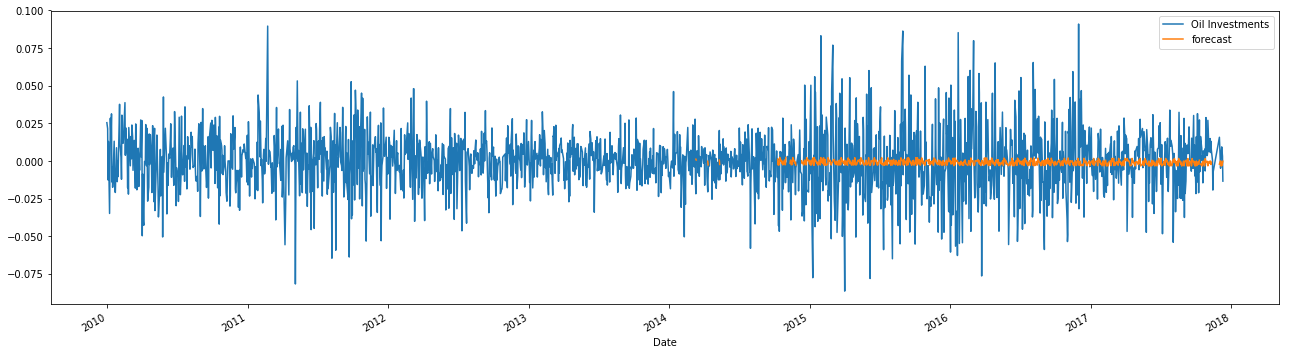

In [46]:
df1['forecast'] = results.predict(start=1200,end=1970,dynamic=True)
df1[['Oil Investments','forecast']].plot(figsize=(22,6))
plt.show()

## Now creating some data to predict future of this

In [47]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [48]:
future_datest_df1=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [49]:
future_datest_df1.tail()

,Oil Investments,forecast
2019-06-15,NaN,NaN
2019-07-15,NaN,NaN
2019-08-15,NaN,NaN
2019-09-15,NaN,NaN
2019-10-15,NaN,NaN


In [50]:
future_df1=pd.concat([df1,future_datest_df1])

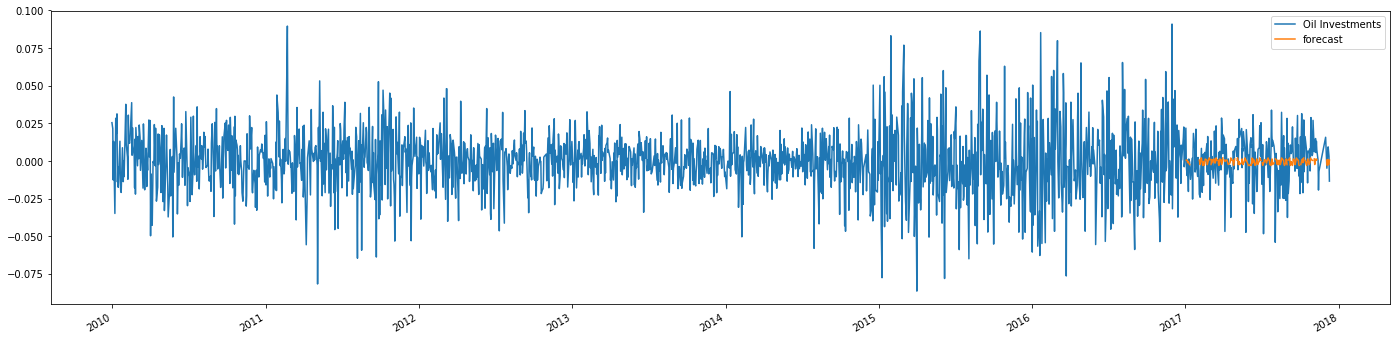

In [51]:
future_df1['forecast'] = results.predict(start = 1783, end = 1970, dynamic= True)  
future_df1[['Oil Investments', 'forecast']].plot(figsize=(24,6))
plt.show()

# Observation:
    
## Oil Investments stock is changing with respect to time. It goes up and down with respect to time. So there is no confirmation that when it goes high. So the people who wants to invest their money in stock market they go for Gold Investments.